In [138]:
import pandas as pd
import numpy as np
from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot     as     plt
from scipy.stats import chi2_contingency
import seaborn as sns

In [95]:
origdf=pd.read_csv('responses.csv')

In [96]:
origdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [97]:
origdf.shape

(1010, 150)

In [98]:
origdf.columns
origdf.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [99]:
df=origdf[['Finances','Gender','Village - town','Healthy eating']]

In [100]:
df.max()

Finances          5.0
Healthy eating    5.0
dtype: float64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
Finances          1007 non-null float64
Gender            1004 non-null object
Village - town    1006 non-null object
Healthy eating    1007 non-null float64
dtypes: float64(2), object(2)
memory usage: 31.6+ KB


In [105]:
df['Finances'].value_counts()

3.0    361
4.0    252
2.0    174
1.0    125
5.0     98
Name: Finances, dtype: int64

In [103]:
### Treated NaN inFinances with 3 as the mean, median and mode are 3 
df['Finances'].fillna(3,inplace=True)

In [107]:
df['Gender'].value_counts()

female    599
male      411
Name: Gender, dtype: int64

In [106]:
df['Gender'].fillna('female',inplace=True)

In [110]:
df['Village - town'].value_counts()

city       711
village    299
Name: Village - town, dtype: int64

In [109]:
df['Village - town'].fillna('city',inplace=True)

In [113]:
df['Healthy eating'].value_counts()

3.0    507
4.0    239
2.0    137
1.0     81
5.0     46
Name: Healthy eating, dtype: int64

In [112]:
df['Healthy eating'].fillna(3,inplace=True)

In [117]:
df

,Finances,Gender,Village - town,Healthy eating
0,3.0,female,village,4.0
1,3.0,female,city,3.0
2,2.0,female,city,3.0
3,2.0,female,city,3.0
4,4.0,female,village,4.0
5,2.0,male,city,2.0
6,4.0,female,village,4.0
7,3.0,male,city,2.0
8,2.0,female,city,1.0
9,4.0,female,city,3.0


In [118]:
df.isnull().sum()

Finances          0
Gender            0
Village - town    0
Healthy eating    0
dtype: int64

In [119]:
df.std()

Finances          1.142663
Healthy eating    0.935473
dtype: float64

In [ ]:
H0--Saving is  gender dependant
HA--Saving is not gender dependant

In [121]:
sum(df['Finances']).where

3054.0

In [142]:
finace_gender=pd.crosstab(df['Gender'],df['Finances'])

In [143]:
finace_gender

Finances,1.0,2.0,3.0,4.0,5.0
Gender,,,,,
female,65,98,223,150,63
male,60,76,138,102,35


In [144]:
finace_gender=np.array(finace_gender)

In [145]:
stat,p_value,dof,freq=chi2_contingency(finace_gender)

In [146]:
p_value

0.25518454225298753

In [ ]:
p_value more than 0.05 hence failed to reject H0
which means savings is not gender dependant 

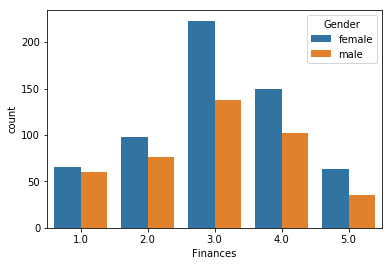

In [141]:
sns.countplot(x='Finances', hue='Gender',data=df)

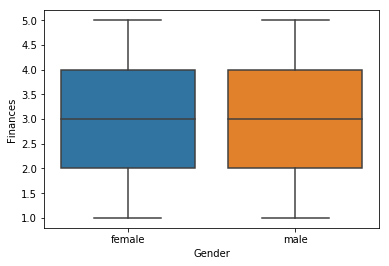

In [162]:
sns.boxplot(x="Gender",y="Finances",data=df)

In [ ]:
 H0 saving not geographic related
Ha Saving geograhic related

In [150]:
finance_vc=pd.crosstab(df['Village - town'],df['Finances'])

In [151]:
finance_vc=np.array(finance_vc)

In [153]:
stat,p_value_2,dof,freq=chi2_contingency(finance_vc)

In [154]:
p_value_2

0.009745541835991274

In [ ]:
p_value less than 0.05 hence reject H0
which means savings is geographic dependant 

In [ ]:
H0--No Significant change 
Ha--Significat Change in eating habits

In [157]:
male_health = df[df['Gender']=='male']['Healthy eating']
female_health = df[df['Gender']=='female']['Healthy eating']
import scipy.stats as stats
t_stats,p_value = stats.ttest_ind(male_health,female_health)
print(p_value)


0.04685965412880698


In [ ]:
p_value less than 0.05 hence reject H0
which means signifcant change in eating habits

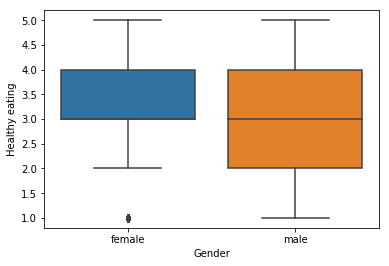

In [159]:
sns.boxplot(x="Gender",y="Healthy eating",data=df)

In [ ]:
all women are above mean male eating habits which means women have better eating habits

In [ ]:
H0--No significant change 
Ha-- Significant change between geographical location

In [160]:
village_health = df[df['Village - town']=='village']['Healthy eating']
city_health = df[df['Village - town']=='city']['Healthy eating']
t_stats,p_value=stats.ttest_ind(village_health,city_health)
p_value

0.2864594559841501

In [ ]:
p_value more than fail to reject H0 which means no significant change due to geographical location

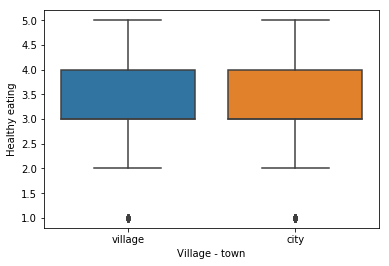

In [161]:
sns.boxplot(x="Village - town",y="Healthy eating",data=df)

In [ ]:
Box plot shows similar range between city and village people so no change due to this 